> # Chapter 17. Classification
---




### 1.  Nearest Neighbors 


### 2.  Training and Testing



In [1]:
!pip install datascience --upgrade

     |████████████████████████████████| 51kB 1.8MB/s 
     |████████████████████████████████| 102kB 4.7MB/s 
  Created wheel for datascience: filename=datascience-0.15.6-cp36-none-any.whl size=43847 sha256=c95cf8ce7e06a6c5835de79b9b6106e6adaa0e26cd87ca2536c81a34c8b3eb0a
  Stored in directory: /root/.cache/pip/wheels/d1/a3/c2/13ec7581ad784309d5b5763263e12b0bfbb9cc85bbb61c20dc
Successfully built datascience
  Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3
  Found existing installation: datascience 0.10.6
    Uninstalling datascience-0.10.6:
      Successfully uninstalled datascience-0.10.6


In [2]:
# HIDDEN
from datascience import *
import numpy as np
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
import matplotlib.pyplot as plt
plots.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  """


+ Data science에서 중요한 task 중 하나는 ___classification (분류)___ 이다.
 - 온라인 결재가 발생했을 때, 정상 결재인가 부정 결재인가?
 - 두 남녀의 정보가 있을 때, 잘 어울리는 쌍인가 그렇지 않은 쌍인가?
 - 환자 진료 정보가 있을 때, 암이 걸렸는가 그렇지 않은가?
 - 유권자가 있을 때, 내게 표를 줄 사람인가 그렇지 않은 사람인가?

> ### Nearest Neighbors
---
+ 가장 비슷한 사례를 참고하여 분류를 한다.
+ 다음 신장병(Chronic kidney disease; CKD) 데이터를 가지고 개념을 이해해 보자.

In [3]:
ckd = Table.read_table('https://raw.githubusercontent.com/data-8/materials-sp18/master/lec/ckd.csv').relabeled('Blood Glucose Random', 'Glucose')
ckd

Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Glucose,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,1
53,90,1.02,2,0,abnormal,abnormal,present,notpresent,70,107,7.2,114,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,1
63,70,1.01,3,0,abnormal,abnormal,present,notpresent,380,60,2.7,131,4.2,10.8,32,4500,3.8,yes,yes,no,poor,yes,no,1
68,80,1.01,3,2,normal,abnormal,present,present,157,90,4.1,130,6.4,5.6,16,11000,2.6,yes,yes,yes,poor,yes,no,1
61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,148,3.9,135,5.2,7.7,24,9200,3.2,yes,yes,yes,poor,yes,yes,1
48,80,1.025,4,0,normal,abnormal,notpresent,notpresent,95,163,7.7,136,3.8,9.8,32,6900,3.4,yes,no,no,good,no,yes,1
69,70,1.01,3,4,normal,abnormal,notpresent,notpresent,264,87,2.7,130,4,12.5,37,9600,4.1,yes,yes,yes,good,yes,no,1
73,70,1.005,0,0,normal,normal,notpresent,notpresent,70,32,0.9,125,4,10,29,18900,3.5,yes,yes,no,good,yes,no,1
73,80,1.02,2,0,abnormal,abnormal,notpresent,notpresent,253,142,4.6,138,5.8,10.5,33,7200,4.3,yes,yes,yes,good,no,no,1
46,60,1.01,1,0,normal,normal,notpresent,notpresent,163,92,3.3,141,4,9.8,28,14600,3.2,yes,yes,no,good,no,no,1


+ 이 중에서 일부 열만을 standard unit으로 변환하여 가져오자.
 + ``Class``가 0과 1이면 각각 신장병 환자 여부가 ``False``, ``True``임을 뜻한다.

In [4]:
def standard_units(x):
    return (x - np.mean(x))/np.std(x)

ckd = Table().with_columns(
    'Hemoglobin', standard_units(ckd.column('Hemoglobin')),
    'Glucose', standard_units(ckd.column('Glucose')),
    'White Blood Cell Count', standard_units(ckd.column('White Blood Cell Count')),
    'Class', ckd.column('Class')
)
ckd

Hemoglobin,Glucose,White Blood Cell Count,Class
-0.865744,-0.221549,-0.569768,1
-1.45745,-0.947597,1.16268,1
-1.00497,3.84123,-1.27558,1
-2.81488,0.396364,0.809777,1
-2.08395,0.643529,0.232293,1
-1.35303,-0.561402,-0.505603,1
-0.413266,2.04928,0.360623,1
-1.28342,-0.947597,3.34429,1
-1.10939,1.87936,-0.409356,1
-1.35303,0.489051,1.96475,1


+ Hemoglobin, Glucose 두 변수의 scatter graph를 Class별로 그려보자.

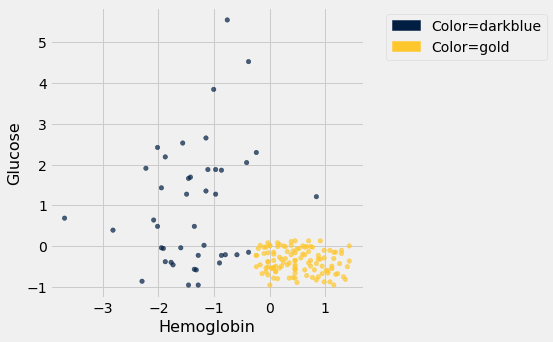

In [5]:
color_table = Table().with_columns(
    'Class', make_array(1, 0),
    'Color', make_array('darkblue', 'gold')
)
ckd = ckd.join('Class', color_table)

ckd.scatter('Hemoglobin', 'Glucose', colors='Color')

+ 만약 새로운 환자가 Alice가 있고 Glucose, Hemoglobin 측정데이터가 있을 때, 분류 결과를 예측할 수 있을까?
+ Glucose=1.5, Hemoglobin=0 라고 가정해 보자.

In [0]:
def distance(point1, point2):
    """The distance between two arrays of numbers."""
    return np.sqrt(np.sum((point1 - point2)**2))

def all_distances(training, point):
    """The distance between p (an array of numbers) and the numbers in row i of attribute_table."""
    attributes = training.drop('Class')
    def distance_from_point(row):
        return distance(point, np.array(row))
    return attributes.apply(distance_from_point)

def table_with_distances(training, point):
    """A copy of the training table with the distance from each row to array p."""
    return training.with_column('Distance', all_distances(training, point))

def closest(training, point, k):
    """A table containing the k closest rows in the training table to array p."""
    with_dists = table_with_distances(training, point)
    sorted_by_distance = with_dists.sort('Distance')
    topk = sorted_by_distance.take(np.arange(k))
    return topk


In [0]:
def show_closest(point):
    """point = array([x,y]) 
    gives the coordinates of a new point
    shown in red"""
    
    HemoGl = ckd.drop('White Blood Cell Count', 'Color')
    t = closest(HemoGl, point, 1)
    x_closest = t.row(0).item(1)
    y_closest = t.row(0).item(2)
    ckd.scatter('Hemoglobin', 'Glucose', colors='Color')
    plt.scatter(point.item(0), point.item(1), color='red', s=30)
    plt.plot(make_array(point.item(0), x_closest), make_array(point.item(1), y_closest), color='k', lw=2);

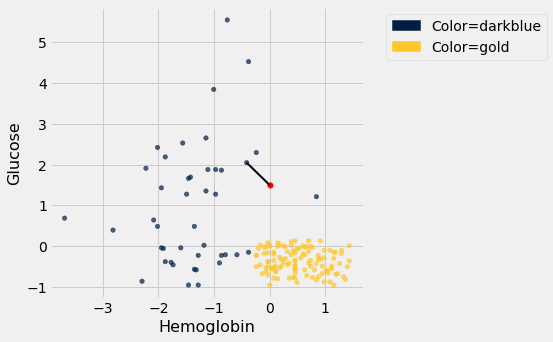

In [8]:
# In this example, Alice's Hemoglobin attribute is 0 and her Glucose is 1.5.
alice = make_array(0, 1.5)
show_closest(alice)

+ 가장 가까운 데이터가 CKD였으므로 Alice도 CKD로 분류하게 된다.

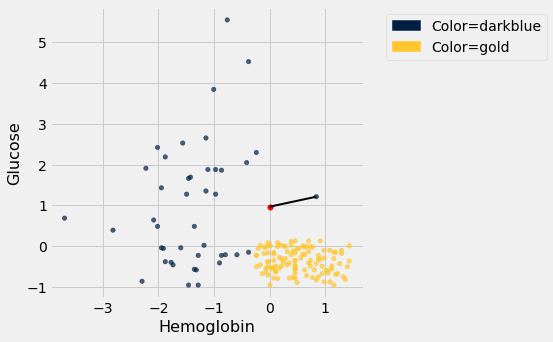

In [9]:
alice = make_array(0, 0.97)
show_closest(alice)

+ 역시 가장 가까운 데이터가 CKD였으므로 Alice도 CKD로 분류하게 된다.
+ Decision Boundary 를 계산해 보자.

In [0]:
def majority(topkclasses):
    """1 if the majority of the "Class" column is 1s, and 0 otherwise."""
    ones = topkclasses.where('Class', are.equal_to(1)).num_rows
    zeros = topkclasses.where('Class', are.equal_to(0)).num_rows
    if ones > zeros:
        return 1
    else:
        return 0

def classify(training, p, k):
    """Classify an example with attributes p using k-nearest neighbor classification with the given training table."""
    closestk = closest(training, p, k)
    topkclasses = closestk.select('Class')
    return majority(topkclasses)

def classify_grid(training, test, k):
    c = make_array()
    for i in range(test.num_rows):
        # Run the classifier on the ith patient in the test set
        c = np.append(c, classify(training, make_array(test.row(i)), k))   
    return c


In [0]:
x_array = make_array()
y_array = make_array()
for x in np.arange(-2, 2.1, 0.1):
    for y in np.arange(-2, 2.1, 0.1):
        x_array = np.append(x_array, x)
        y_array = np.append(y_array, y)
        
test_grid = Table().with_columns(
    'Hemoglobin', x_array,
    'Glucose', y_array
)

c = classify_grid(ckd.drop('White Blood Cell Count', 'Color'), test_grid, 1)

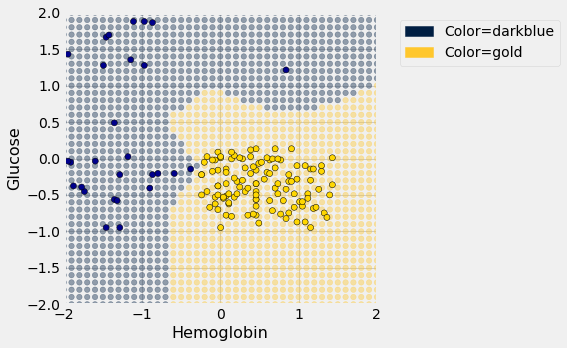

In [12]:
test_grid = test_grid.with_column('Class', c).join('Class', color_table)
test_grid.scatter('Hemoglobin', 'Glucose', colors='Color', alpha=0.4, s=30)

plt.scatter(ckd.column('Hemoglobin'), ckd.column('Glucose'), c=ckd.column('Color'), edgecolor='k')

plt.xlim(-2, 2)
plt.ylim(-2, 2);

#### k-Nearest Neighbors ###

그러나 classification이 명확하지 않은 경우도 많다.
다음 그림과 같이 hemoglobin level 대신 white blood cell count로 바뀐 경우를 살펴보자. 

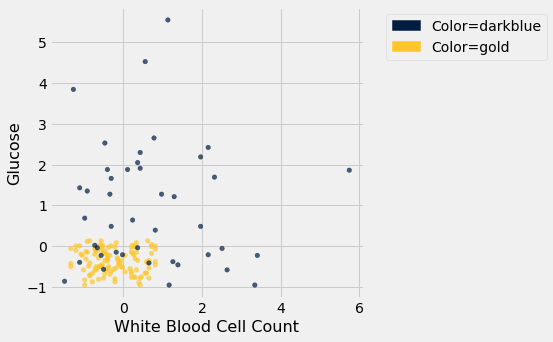

In [13]:
ckd.scatter('White Blood Cell Count', 'Glucose', colors='Color')

- non-CKD 개인은 모두 왼쪽 하단에 모여 있다. CKD 환자의 대부분은 해당 군집의 위 또는 오른쪽에 있지만 전부는 아니다. CKD 환자 중 일부는 위 그림의 왼쪽 아래에 있다 (Gold 클러스터에 흩어져있는 소수의 파란색 점으로 표시됨). 즉, 누군가 두 혈액 검사 측정에서 CKD가 있는지 여부를 확실하게 알 수 없다는 것이다.

- Alice의 포도당 수치와 백혈구 수치가 주어지면 그녀에게 CKD가 있는지 예측할 수 있을까? 
 + Alice가 왼쪽 하단에 있는 경우 non-CKD가로 예측하고, 그렇지 않으면 CKD가있는 것으로 예측할 수 있다.
 + 그러나 100 % 정확하지는 않다.

- 만약, nearest neighbor로 예측하는 것도 가능하다. 
 + 앞서 직관적인 분류와 매우 유사하지만 때로는 다른 예측을 한다.
 + 예를 들면, Alice의 혈액 검사 결과가 왼쪽 하단의 파란색 점 중 하나 근처에 배치될 경우 직관적인 분류는 'non-CKD 아님'로 예측하는 반면 nearest neighbor classifier는 'CKD'로 예측한다.

- 이러한 상황을 보다 합리적으로 해결하는 것은 k-nearest neighbor (k-NN)이다.
 + Alice의 진단의 경우 가장 가까운 세 환자(k=3인 예)를 찾고 다수결에 따라 예측을 하는 것이다.
 + k=4, 5 또는 그 이상 가능하지만 홀수를 선택하는 것이 편리하다. 

> ### Training and Testing
---
+ 분류 결과가 얼마나 좋은지를 어떻게 평가하나?
+ 만약 모든 데이터를 1-NN 분류한다면?
  - 분류 정확도는 100%
  - 이것이 완벽한 분류기를 만들었단 뜻인가?
  
+ Training : 분류 결과를 생성하는 데 사용되는 데이터
+ Test : 분류 성능을 평가하는 데 사용되는 데이터
---


#### CKD데이터 예

In [0]:
shuffled_ckd = ckd.sample(with_replacement=False)
training = shuffled_ckd.take(np.arange(79))
testing = shuffled_ckd.take(np.arange(79, 158))

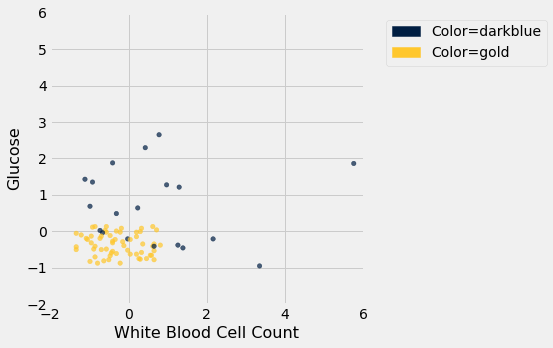

In [15]:
training.scatter('White Blood Cell Count', 'Glucose', colors='Color')
plt.xlim(-2, 6)
plt.ylim(-2, 6);

분류경계를 살펴보면 다음과 같다.

In [0]:
x_array = make_array()
y_array = make_array()
for x in np.arange(-2, 6.1, 0.25):
    for y in np.arange(-2, 6.1, 0.25):
        x_array = np.append(x_array, x)
        y_array = np.append(y_array, y)
        
test_grid = Table().with_columns(
    'Glucose', x_array,
    'White Blood Cell Count', y_array
)

In [0]:
c = classify_grid(training.drop('Hemoglobin', 'Color'), test_grid, 1)

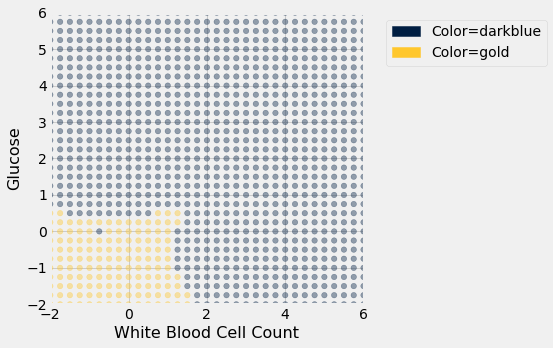

In [18]:
test_grid = test_grid.with_column('Class', c).join('Class', color_table)
test_grid.scatter('White Blood Cell Count', 'Glucose', colors='Color', alpha=0.4, s=30)

plt.xlim(-2, 6)
plt.ylim(-2, 6);

테스트집합의 결과를 같이 그려본다.

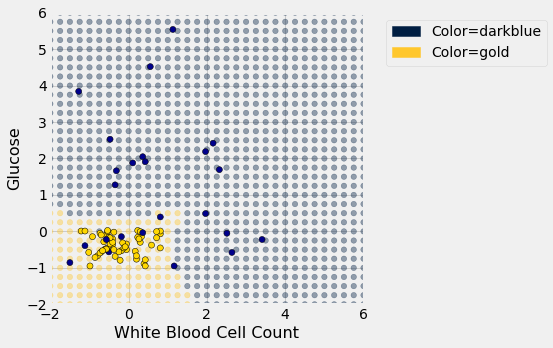

In [19]:

#test_grid = test_grid.with_column('Class', c).join('Class', color_table)
test_grid.scatter('White Blood Cell Count', 'Glucose', colors='Color', alpha=0.4, s=30)

plt.scatter(testing.column('White Blood Cell Count'), testing.column('Glucose'), c=testing.column('Color'), edgecolor='k')

plt.xlim(-2, 6)
plt.ylim(-2, 6);

- Test sample에 대해 분류한 결과 대부분 잘 분류하였지만 일부 잘못된 결과(gold지역안의 blue점들)를 보인다. 

#### wine데이터 예
+ 이번에는 포도 class에 관한 wine 데이터를 사용해 보자.

In [66]:
wine = Table.read_table('https://raw.githubusercontent.com/data-8/textbook/gh-pages/data/wine.csv')
wine

Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diulted wines,Proline
1,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050
1,13.16,2.36,2.67,18.6,101,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.5,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480
1,13.24,2.59,2.87,21,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.2,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
1,14.39,1.87,2.45,14.6,96,2.5,2.52,0.3,1.98,5.25,1.02,3.58,1290
1,14.06,2.15,2.61,17.6,121,2.6,2.51,0.31,1.25,5.05,1.06,3.58,1295
1,14.83,1.64,2.17,14,97,2.8,2.98,0.29,1.98,5.2,1.08,2.85,1045
1,13.86,1.35,2.27,16,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [67]:
wine.group('Class')

Class,count
1,59
2,71
3,48


In [68]:
def is_one(x):
    if x == 1:
        return 1
    else:
        return 0
    
wine = wine.with_column('Class', wine.apply(is_one, 0))

wine

Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diulted wines,Proline
1,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050
1,13.16,2.36,2.67,18.6,101,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.5,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480
1,13.24,2.59,2.87,21,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.2,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
1,14.39,1.87,2.45,14.6,96,2.5,2.52,0.3,1.98,5.25,1.02,3.58,1290
1,14.06,2.15,2.61,17.6,121,2.6,2.51,0.31,1.25,5.05,1.06,3.58,1295
1,14.83,1.64,2.17,14,97,2.8,2.98,0.29,1.98,5.2,1.08,2.85,1045
1,13.86,1.35,2.27,16,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [69]:
wine.group('Class')

Class,count
0,119
1,59


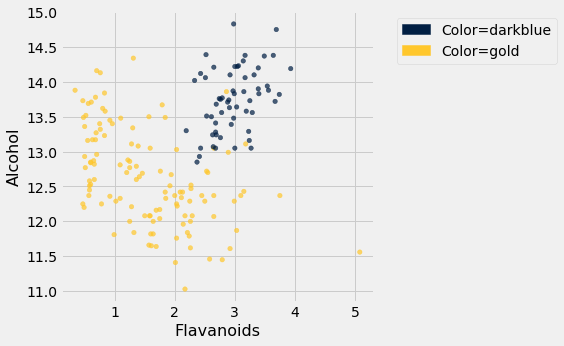

In [70]:
wine_with_colors = wine.join('Class', color_table)
wine_with_colors.scatter('Flavanoids', 'Alcohol', colors='Color')

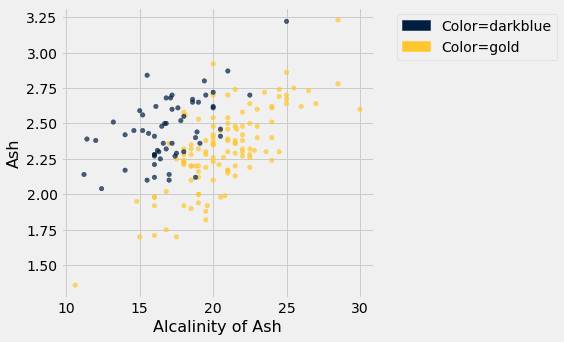

In [71]:
wine_with_colors.scatter('Alcalinity of Ash', 'Ash', colors='Color')

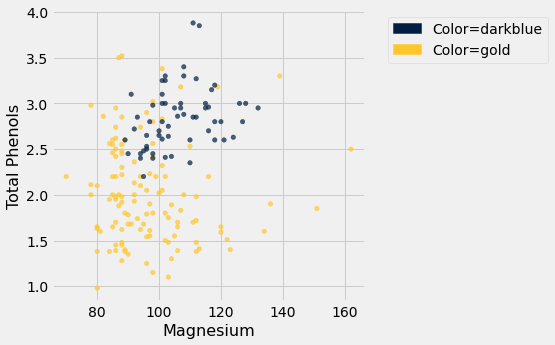

In [72]:
wine_with_colors.scatter('Magnesium', 'Total Phenols', colors='Color')

In [73]:
special_wine = wine.drop('Class').row(0)
classify(wine, special_wine, 5)

1

In [74]:
special_wine = wine.drop('Class').row(177)
classify(wine, special_wine, 5)

0

+ 이제 $k$NN의 성능을 평가해 보자.

In [0]:
shuffled_wine = wine.sample(with_replacement=False) 
training_set = shuffled_wine.take(np.arange(89))
test_set  = shuffled_wine.take(np.arange(89, 178))

In [0]:
def count_zero(array):
    """Counts the number of 0's in an array"""
    return len(array) - np.count_nonzero(array)

def count_equal(array1, array2):
    """Takes two numerical arrays of equal length
    and counts the indices where the two are equal"""
    return count_zero(array1 - array2)

def evaluate_accuracy(training, test, k):
    test_attributes = test.drop('Class')
    def classify_testrow(row):
        return classify(training, row, k)
    c = test_attributes.apply(classify_testrow)
    return count_equal(c, test.column('Class')) / test.num_rows

In [77]:
evaluate_accuracy(training_set, test_set, 5)

0.898876404494382

+ 데이터를 어떻게 Training/Test Data로 나누느냐에 따라 정확도가 달라짐을 잊지 말자.
+ 이러한 정확도를 추정하기 위해서는 앞에서 공부한 바와 같이 empirical distribution을 구하는 게 좋다.

### Multiple Linear Regression

#### House데이터 
여러 해 동안 Iowa주 Ames시의 주택가격을 조사한 데이터이다.

여러 변수들로부터 주택가격을 예측해 보자. 

In [78]:
all_sales = Table.read_table('https://raw.githubusercontent.com/data-8/textbook/gh-pages/data/house.csv')
sales = all_sales.where('Bldg Type', '1Fam').where('Sale Condition', 'Normal').select(
    'SalePrice', '1st Flr SF', '2nd Flr SF', 
    'Total Bsmt SF', 'Garage Area', 
    'Wood Deck SF', 'Open Porch SF', 'Lot Area', 
    'Year Built', 'Yr Sold')
sales.sort('SalePrice')

SalePrice,1st Flr SF,2nd Flr SF,Total Bsmt SF,Garage Area,Wood Deck SF,Open Porch SF,Lot Area,Year Built,Yr Sold
35000,498,0,498,216,0,0,8088,1922,2006
39300,334,0,0,0,0,0,5000,1946,2007
40000,649,668,649,250,0,54,8500,1920,2008
45000,612,0,0,308,0,0,5925,1940,2009
52000,729,0,270,0,0,0,4130,1935,2008
52500,693,0,693,0,0,20,4118,1941,2006
55000,723,363,723,400,0,24,11340,1920,2008
55000,796,0,796,0,0,0,3636,1922,2008
57625,810,0,0,280,119,24,21780,1910,2009
58500,864,0,864,200,0,0,8212,1914,2010


아래와 같이 주택가격 변수에 대해 histogram을 그려보자.
+ 높은 분산(variability)을 보인다.
+ 정규성(normality)을 보이지 않는다.

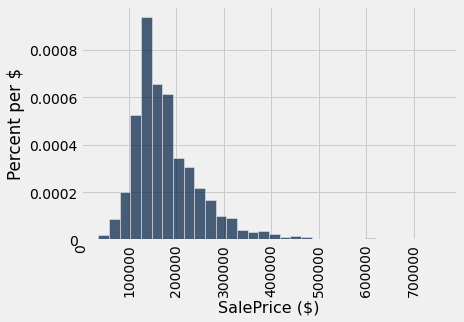

In [79]:
sales.hist('SalePrice', bins=32, unit='$')

#### Correlation
단일 변수로 비교적 정확하게 예측을 하는 것이 어렵게 보인다.
+ 예: the area of first floor (square feet)

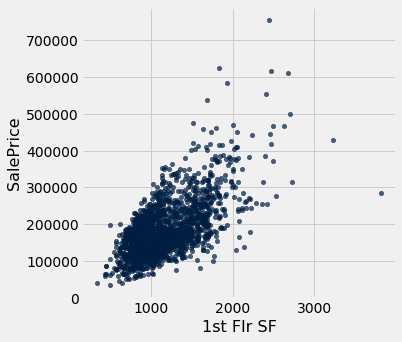

In [80]:
sales.scatter('1st Flr SF', 'SalePrice')

In [81]:
def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))
    
correlation(sales, 'SalePrice', '1st Flr SF')

0.6424662541030225

실제로 다른 변수들도 상관계수가 0.7미만이다.

In [82]:
for label in sales.labels:
    print('Correlation of', label, 'and SalePrice:\t', correlation(sales, label, 'SalePrice'))

Correlation of SalePrice and SalePrice:	 1.0
Correlation of 1st Flr SF and SalePrice:	 0.6424662541030225
Correlation of 2nd Flr SF and SalePrice:	 0.3575218942800824
Correlation of Total Bsmt SF and SalePrice:	 0.652978626757169
Correlation of Garage Area and SalePrice:	 0.6385944852520443
Correlation of Wood Deck SF and SalePrice:	 0.3526986661950492
Correlation of Open Porch SF and SalePrice:	 0.3369094170263733
Correlation of Lot Area and SalePrice:	 0.2908234551157694
Correlation of Year Built and SalePrice:	 0.5651647537135916
Correlation of Yr Sold and SalePrice:	 0.02594857908072111


그런데 변수들을 혼합하면 어떻게 될까?
+ first floor area와 second floor area의 합은 더 높은 상관계수를 나타낸다. 

In [83]:
both_floors = sales.column(1) + sales.column(2)
correlation(sales.with_column('Both Floors', both_floors), 'SalePrice', 'Both Floors')

0.7821920556134877

위 결과는 두 개이상의 변수를 통해 예측하는 것이 더 좋을 수 있음을 암시한다.


Multiple linear regression
+ 2개 이상의 변수들의 선형 조합으로 종속변수를 예측하는 regression model

내용을 살펴보기 위해 다음과 같이 training/test 데이터셋으로 분리하자. 

In [84]:
train, test = sales.split(1001)
print(train.num_rows, 'training and', test.num_rows, 'test instances.')

1001 training and 1001 test instances.


다음과 같이 기울기배열이 주어지면 예측값을 계산할 수 있다. 

In [85]:
def predict(slopes, row):
    return sum(slopes * np.array(row))

example_row = test.drop('SalePrice').row(0)
print('Predicting sale price for:', example_row)
example_slopes = np.random.normal(10, 1, len(example_row))
print('Using slopes:', example_slopes)
print('Result:', predict(example_slopes, example_row))

Predicting sale price for: Row(1st Flr SF=732, 2nd Flr SF=732, Total Bsmt SF=732.0, Garage Area=470.0, Wood Deck SF=0, Open Porch SF=40, Lot Area=8814, Year Built=1968, Yr Sold=2008)
Using slopes: [ 9.44842946 11.71029322 11.31566118 11.09378779 10.69016416  9.66125739
  8.67757846 10.62909271  9.80216542]
Result: 146456.75873733294


실제값과 비교를 해 볼 수 있는 준비가 되었다. 

In [86]:
print('Actual sale price:', test.column('SalePrice').item(0))
print('Predicted sale price using random slopes:', predict(example_slopes, example_row))

Actual sale price: 141000
Predicted sale price using random slopes: 146456.75873733294


#### Least Squares Regression

평가 함수로써 root mean squared error (RMSE)를 정의하자. 

In [87]:
train_prices = train.column(0)
train_attributes = train.drop(0)

def rmse(slopes, attributes, prices):
    errors = []
    for i in np.arange(len(prices)):
        predicted = predict(slopes, attributes.row(i))
        actual = prices.item(i)
        errors.append((predicted - actual) ** 2)
    return np.mean(errors) ** 0.5

def rmse_train(slopes):
    return rmse(slopes, train_attributes, train_prices)

print('RMSE of all training examples using random slopes:', rmse_train(example_slopes))

RMSE of all training examples using random slopes: 83478.1859257761


앞 장에서 배운 `minimize` 함수를 통해 해를 찾아보자. 
+ `array=True` : array를 전달한다. 

In [88]:
best_slopes = minimize(rmse_train, start=example_slopes, smooth=True, array=True)
print('The best slopes for the training set:')
Table(train_attributes.labels).with_row(list(best_slopes)).show()
print('RMSE of all training examples using the best slopes:', rmse_train(best_slopes))

The best slopes for the training set:


1st Flr SF,2nd Flr SF,Total Bsmt SF,Garage Area,Wood Deck SF,Open Porch SF,Lot Area,Year Built,Yr Sold
68.4719,72.0958,51.8145,53.5025,21.5672,64.6279,0.52605,479.736,-476.732


RMSE of all training examples using the best slopes: 30029.856032696636


#### Interpreting Multiple Regression 

+ 각 기울기는 개별 변수와 주택가격사이의 관계를 설명한다. 
+ RMSE(약 \$30,000)는 평균예측오차이며 테스트셋에서 이를 조사함으로써 예측의 일반성을 검토할 수 있다.

In [89]:
test_prices = test.column(0)
test_attributes = test.drop(0)

def rmse_test(slopes):
    return rmse(slopes, test_attributes, test_prices)

rmse_linear = rmse_test(best_slopes)
print('Test set RMSE for multiple linear regression:', rmse_linear)

Test set RMSE for multiple linear regression: 32423.062520419062


다음 그림과 같이 fitted value와 real value사이의 산점도를 그려봄으로서 예측의 정확도를 시각화해 볼 수 있다. 

만약 완벽한 예측이라면 기울기 1인 직선위에 모든 점들이 놓일 것이다. 

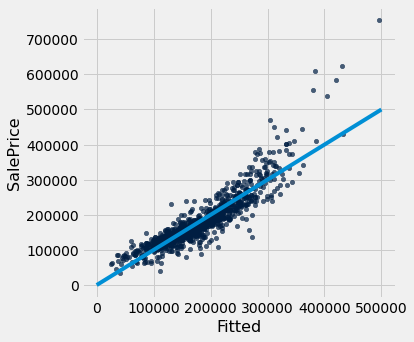

In [90]:
def fit(row):
    return sum(best_slopes * np.array(row))

test.with_column('Fitted', test.drop(0).apply(fit)).scatter('Fitted', 0)
plots.plot([0, 5e5], [0, 5e5]);

다음과 같이 residual plot도 그려보자.
+ 고가주택에 대해 underestimate 되는 경항을 볼 수 있다. 

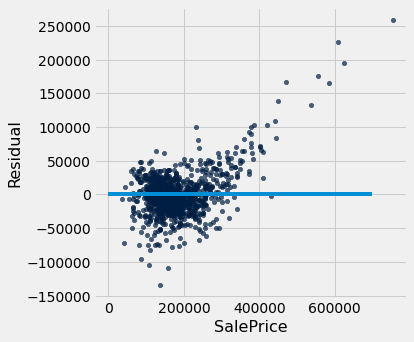

In [91]:
test.with_column('Residual', test_prices-test.drop(0).apply(fit)).scatter(0, 'Residual')
plots.plot([0, 7e5], [0, 0]);

## Nearest Neighbors for Regression

또 다른 접근법으로서 *nearest neighbor*를 생각해 보자. 

빠른 계산을 위해 비교적 correlation이 높았던 변수들만을 분석에 포함시킨다. 

In [92]:
train_nn = train.select(0, 1, 2, 3, 4, 8)
test_nn = test.select(0, 1, 2, 3, 4, 8)
train_nn.show(3)

SalePrice,1st Flr SF,2nd Flr SF,Total Bsmt SF,Garage Area,Year Built
320000,1905,0,1905,788,2006
179500,1052,720,720,240,1939
200000,920,941,916,492,2002


분류문제에서와 비슷한 방식으로 구현할 수 있다. (거리 계산에서 `'Class'` 대신 `'SalePrice'`을 빼면 된다.)

In [93]:
def distance(pt1, pt2):
    """The distance between two points, represented as arrays."""
    return np.sqrt(sum((pt1 - pt2) ** 2))

def row_distance(row1, row2):
    """The distance between two rows of a table."""
    return distance(np.array(row1), np.array(row2))

def distances(training, example, output):
    """Compute the distance from example for each row in training."""
    dists = []
    attributes = training.drop(output)
    for row in attributes.rows:
        dists.append(row_distance(row, example))
    return training.with_column('Distance', dists)

def closest(training, example, k, output):
    """Return a table of the k closest neighbors to example."""
    return distances(training, example, output).sort('Distance').take(np.arange(k))

example_nn_row = test_nn.drop(0).row(0)
closest(train_nn, example_nn_row, 5, 'SalePrice')

SalePrice,1st Flr SF,2nd Flr SF,Total Bsmt SF,Garage Area,Year Built,Distance
157500,720,720,720,480,1964,23.4094
130500,725,754,725,475,1976,25.9037
176000,725,754,725,484,1981,30.7734
168675,738,753,738,484,2006,46.4004
188500,716,716,716,432,2004,59.2284


그리고 간단하게 nearest neighbor들의 평균값을 구하여 예측값으로 사용한다.

In [94]:
def predict_nn(example):
    """Return the majority class among the k nearest neighbors."""
    return np.average(closest(train_nn, example, 5, 'SalePrice').column('SalePrice'))

predict_nn(example_nn_row)

164235.0

In [95]:
print('Actual sale price:', test_nn.column('SalePrice').item(0))
print('Predicted sale price using nearest neighbors:', predict_nn(example_nn_row))

Actual sale price: 141000
Predicted sale price using nearest neighbors: 164235.0


#### Evaluation

이제 전체 test set에 대해서 평가를 해 보자. 

In [96]:
nn_test_predictions = test_nn.drop('SalePrice').apply(predict_nn)
rmse_nn = np.mean((test_prices - nn_test_predictions) ** 2) ** 0.5

print('Test set RMSE for multiple linear regression: ', rmse_linear)
print('Test set RMSE for nearest neighbor regression:', rmse_nn)

Test set RMSE for multiple linear regression:  32423.062520419062
Test set RMSE for nearest neighbor regression: 35363.465901230506


이와 같이 동일한 데이터에 대해서 서로 다른 방법의 성능을 비교해 볼 수 있다.

그러나 데이터를 어떻게 분할하느냐에 따라 결과가 달라질 수 있음에 유의하자.

끝으로 residual plot을 살펴보자. 고가주택에 대한 underestimate 경향은 그대로이지만 linear 모델에 비해 다소 완화되었다. 

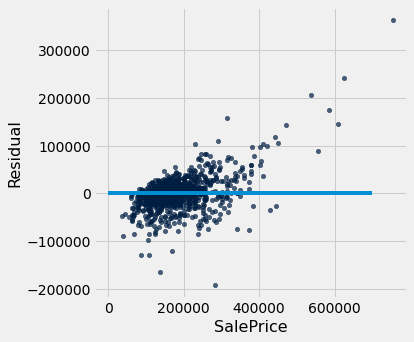

In [97]:
test.with_column('Residual', test_prices-nn_test_predictions).scatter(0, 'Residual')
plots.plot([0, 7e5], [0, 0]);

> ### Recap
---

+ Nearest Neighbor (NN)
 - 기존의 가장 유사한 사례의 결과를 참조하여 분류
 - 일반적으로는 $k$NN 이라 부른다.
+ Training and Testing
 - 분류기의 성능을 객관적으로 테스트하기 위해서 데이터를 Training/Test Data로 분리한다.
 - Training data : 분류기를 생성하는 데 사용되는 데이터
 - Test data : 생성된 분류기의 성능을 평가하는 데 사용되는 데이터
